<a href="https://colab.research.google.com/github/MKPadmavathi/unp-assignments/blob/main/unp_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import sklearn
import sklearn.metrics as met


In [ ]:
data=pd.read_csv("/content/garments_worker_productivity.csv")

In [ ]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
data.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
#data=data.reset_index()

In [ ]:
data["wip"].fillna(np.mean(data["wip"]),inplace=True)

In [ ]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [ ]:
data["department"].replace('finishing ','finishing',inplace=True)

In [ ]:
data["day"].replace('Monday',1,inplace=True)
data["day"].replace('Tuesday',1,inplace=True)
data["day"].replace('Wednesday',1,inplace=True)
data["day"].replace('Thursday',1,inplace=True)
data["day"].replace('Saturday',0,inplace=True)
data["day"].replace('Sunday',0,inplace=True)


In [ ]:
data["quarter"].replace('Quarter1',0,inplace=True)
data["quarter"].replace('Quarter2',0,inplace=True)
data["quarter"].replace('Quarter3',0,inplace=True)
data["quarter"].replace('Quarter4',1,inplace=True)
data["quarter"].replace('Quarter5',1,inplace=True)

In [ ]:
data["department"].replace('sweing',0,inplace=True)
data["department"].replace('finishing',1,inplace=True)


In [ ]:
data.drop(['date'],axis=1,inplace=True)

In [ ]:
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,1,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,0,1,1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,0,0,1,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,0,0,1,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,0,0,1,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,1,1,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,0,1,1,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,0,1,1,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,0,1,1,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
data.isna().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,1,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,0,1,1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,0,0,1,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,0,0,1,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,0,0,1,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
data['department'].value_counts()

0    691
1    506
Name: department, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

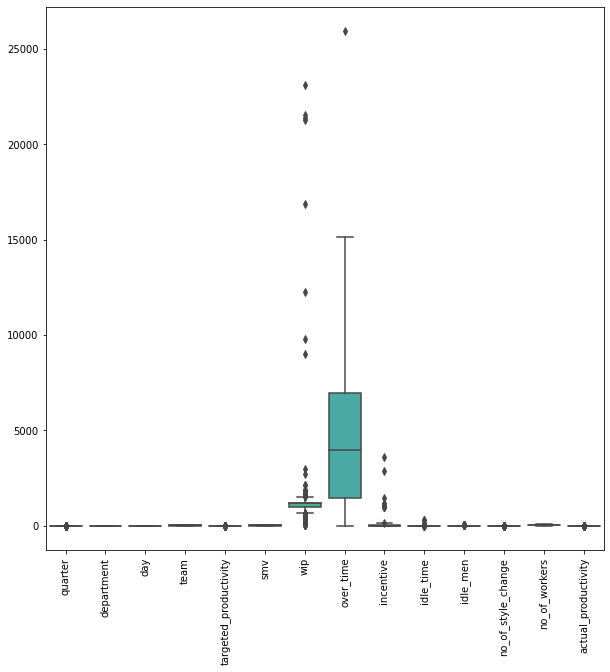

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

In [ ]:
Q1 = data.incentive.quantile(0.25)
Q3 = data.incentive.quantile(0.75)
Q1, Q3

(0.0, 50.0)

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

50.0

In [ ]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

(-75.0, 125.0)

In [ ]:
data[(data.incentive<lower_limit)|(data.incentive>upper_limit)]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
730,0,0,1,1,0.80,22.52,1397.000000,0,138,0.0,0,0,57.0,1.100484
1128,0,1,1,11,0.80,2.90,1190.465991,0,960,0.0,0,0,8.0,0.960625
1129,0,1,1,12,0.80,4.60,1190.465991,0,1080,0.0,0,0,9.0,0.902963
1130,0,1,1,5,0.60,3.94,1190.465991,0,2880,0.0,0,0,12.0,0.864343
1133,0,1,1,9,0.75,2.90,1190.465991,0,3600,0.0,0,0,15.0,0.841000
1137,0,1,1,3,0.80,4.60,1190.465991,0,1440,0.0,0,0,12.0,0.795417
1138,0,1,1,4,0.75,3.94,1190.465991,0,960,0.0,0,0,8.0,0.795388
1139,0,1,1,1,0.75,3.94,1190.465991,0,960,0.0,0,0,8.0,0.794567
1143,0,1,1,2,0.70,3.90,1190.465991,0,1200,0.0,0,0,10.0,0.682500
1148,0,1,1,10,0.70,2.90,1190.465991,0,960,0.0,0,0,8.0,0.477292


In [ ]:
datai = data[(data.incentive>lower_limit)&(data.incentive<upper_limit)]

In [ ]:
datai.shape

(1186, 14)

In [ ]:
Q1 = datai.over_time.quantile(0.25)
Q3 = datai.over_time.quantile(0.75)
Q1 , Q3

(1440.0, 6960.0)

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

5520.0

In [ ]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

(-6840.0, 15240.0)

In [ ]:
datai[(datai.over_time<lower_limit)|(datai.over_time>upper_limit)]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,0,0,1,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951


In [ ]:
datao = datai[(datai.over_time>lower_limit)&(datai.over_time<upper_limit)]

In [ ]:
datao.shape

(1185, 14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

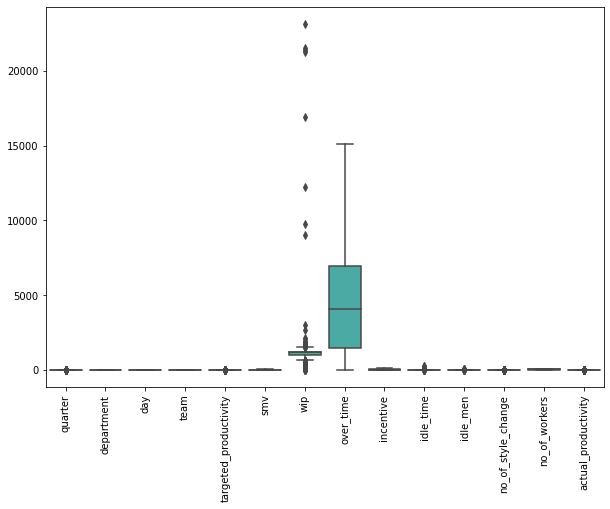

In [ ]:
plt.figure(figsize=(10,7))
p = sns.boxplot(data = datao, orient = 'v',width=0.8)
plt.xticks(rotation=90)

In [ ]:
Q1 = datao.wip.quantile(0.25)
Q3 = datao.wip.quantile(0.75)
Q1, Q3

(970.0, 1190.4659913169319)

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

220.46599131693188

In [ ]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

(639.3010130246022, 1521.1649782923296)

In [ ]:
datao[(datao.wip<lower_limit)|(datao.wip>upper_limit)]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,0,0,1,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
32,0,0,0,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
36,0,0,0,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0,0.700134
43,0,0,0,6,0.80,11.61,539.0,6975,50,0.0,0,0,31.0,0.879714
54,0,0,0,11,0.75,19.31,513.0,6480,45,0.0,0,0,54.0,0.750348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,1,11,0.80,11.41,338.0,3420,50,0.0,0,0,58.0,0.800035
1178,0,0,1,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402
1180,0,0,1,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.800035
1183,0,0,1,10,0.75,21.82,1674.0,6000,34,0.0,0,0,50.0,0.750608


In [ ]:
dataw = datao[(datao.wip>lower_limit)&(datao.wip<upper_limit)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

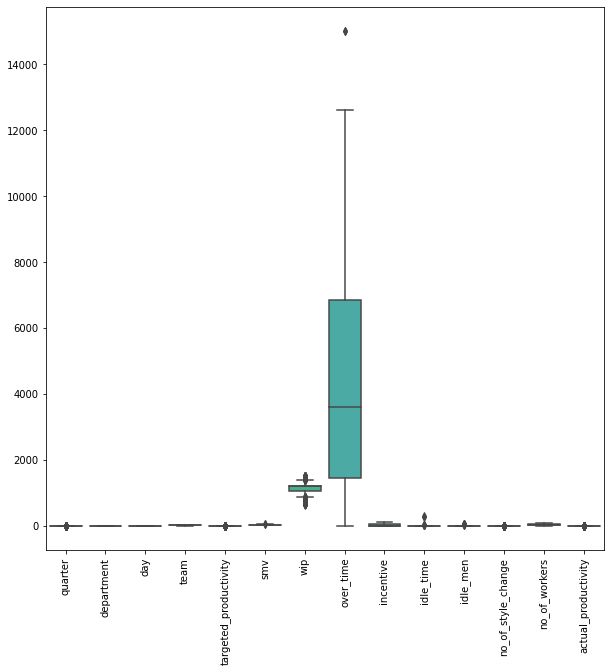

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = dataw,orient = 'v',width=0.8)
plt.xticks(rotation=90)

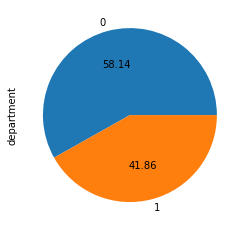

In [ ]:
datao['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

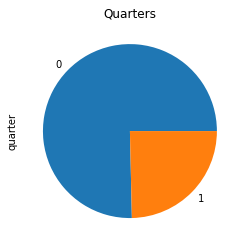

In [ ]:
plt.title("Quarters")
datao['quarter'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
quarters = datao['quarter'].unique()

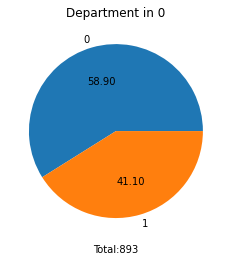

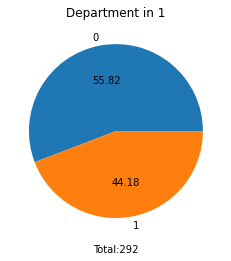

In [ ]:
#Department in each Quarter
for quarter in quarters:
    qcounter = datao['department'][datao['quarter'] == quarter].value_counts()
    plt.pie(qcounter, autopct="%.2f", labels=qcounter.keys())
    plt.title(f"Department in {quarter}")
    plt.xlabel(f"Total:{sum(qcounter)}")
    plt.show()
    print("\n")

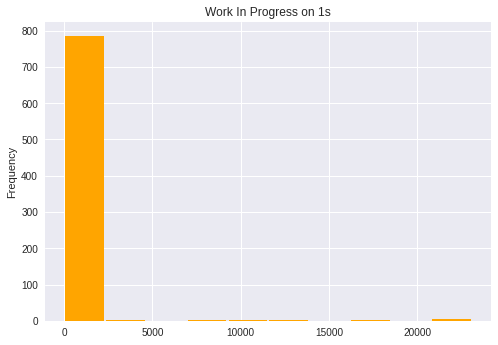

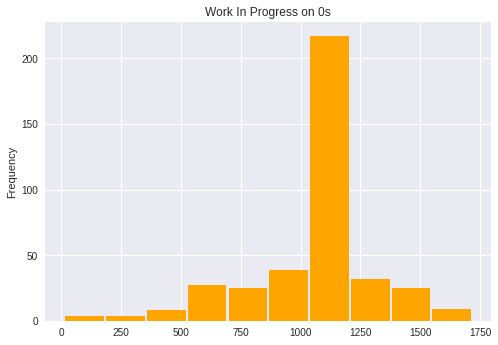

In [ ]:
#Work In Progress(WIP) on week days
days = datao['day'].unique()
for day in days:
    plt.style.use('seaborn')
    plt.title(f"Work In Progress on {day}s")
    wip_day = datao['wip'][datao['day'] == day]
    wip_day.plot(kind="hist", rwidth=0.95, color='orange')
    plt.show()

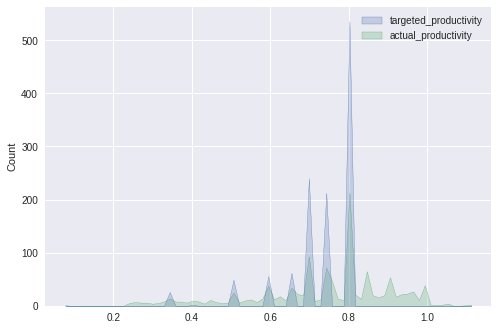

In [ ]:
sns.histplot(data=datao[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

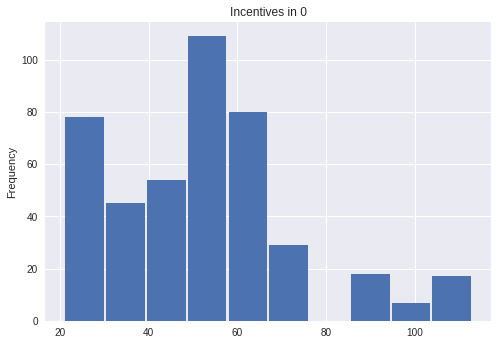

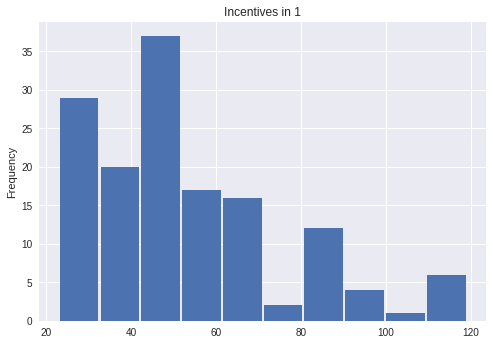

In [ ]:
#Incentives per Quarter
for quarter in quarters:
    plt.title(f"Incentives in {quarter}")
    datao['incentive'][(datao['quarter'] == quarter) & (datao['incentive']>0)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

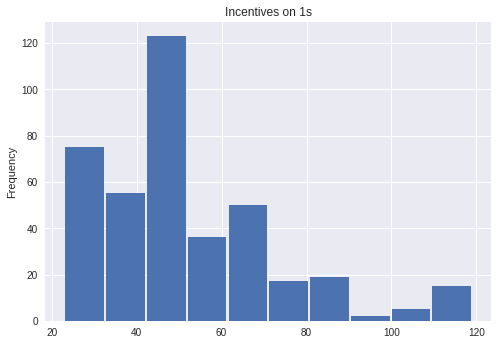

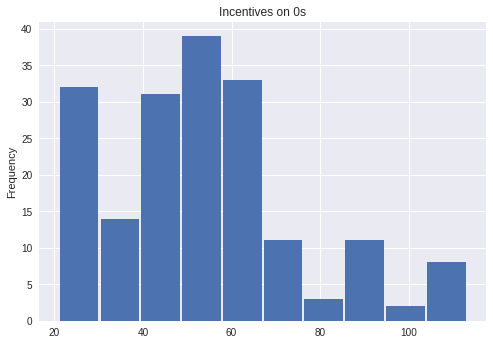

In [ ]:
#Incentives per weekdays
for day in days:
    plt.title(f"Incentives on {day}s")
    datao['incentive'][(datao['day'] == day) & (datao['incentive']>0)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

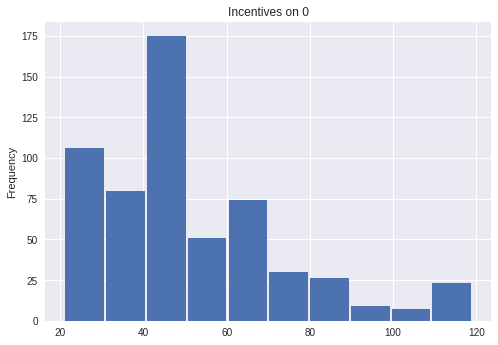

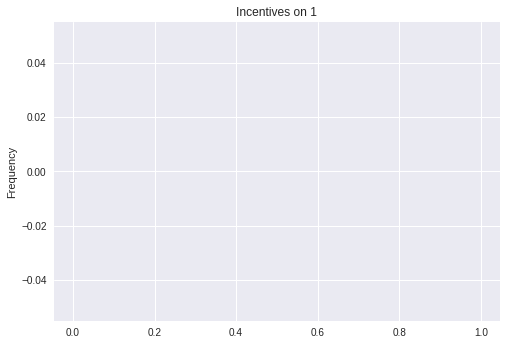

In [ ]:
#Incentives for sweing vs Incentives for finishing
depts = datao['department'].unique()
for dept in depts:
    plt.title(f"Incentives on {dept}")
    datao['incentive'][(datao['department'] == dept) & (datao['incentive']>1)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')  

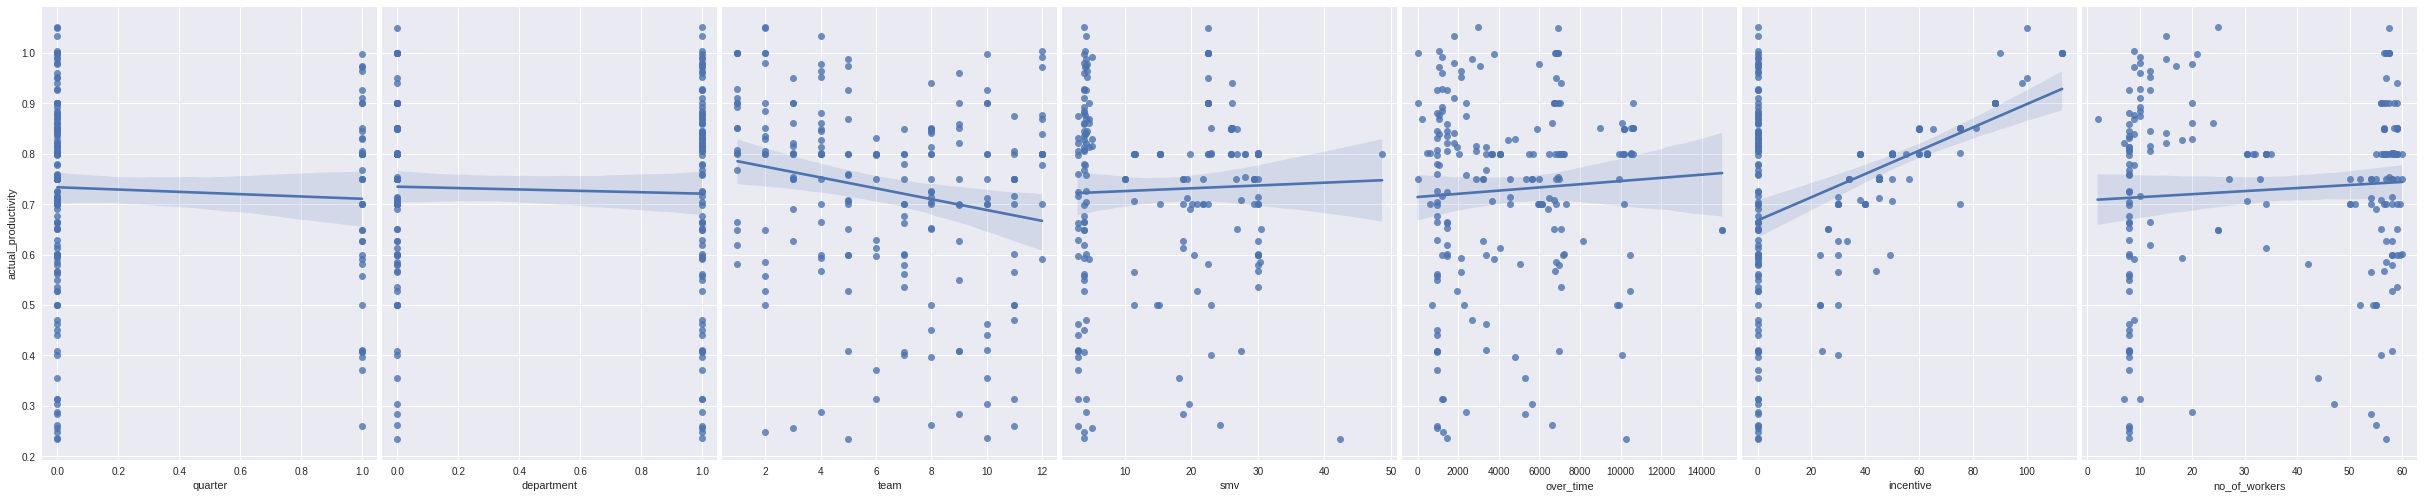

In [ ]:
sns.pairplot(datao.sample(200),x_vars=['quarter','department','team','smv','over_time','incentive','no_of_workers'],y_vars='actual_productivity',size=7 , aspect=0.7 , kind = 'reg')

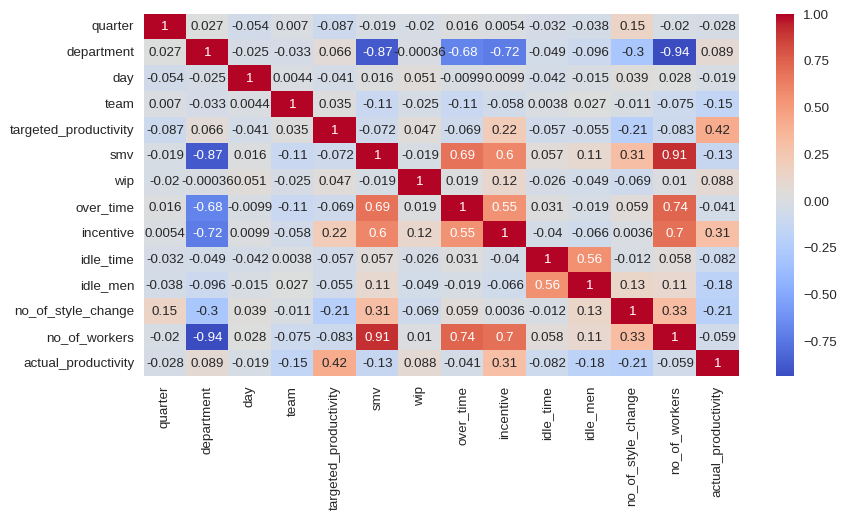

In [ ]:
corr_data=datao.iloc[:,:].corr()
plt.figure(figsize=(10,5),dpi=96)
sns.heatmap(data = corr_data,annot = True,cmap = 'coolwarm')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm1 = smf.ols(formula='actual_productivity ~ targeted_productivity+idle_men+no_of_style_change+wip+no_of_workers+over_time+day+quarter+team+department+incentive+smv',data=datao).fit()

lm1.rsquared

0.38307891353096324

In [ ]:
lm1.params

Intercept                2.725940e-01
targeted_productivity    4.576600e-01
idle_men                -4.737085e-03
no_of_style_change      -7.045596e-03
wip                     -7.611511e-07
no_of_workers            2.882500e-03
over_time               -4.222086e-06
day                     -3.268695e-03
quarter                 -7.866385e-03
team                    -5.742115e-03
department               1.803563e-01
incentive                3.266672e-03
smv                     -4.447136e-03
dtype: float64

In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.383
Model:                             OLS   Adj. R-squared:                  0.377
Method:                  Least Squares   F-statistic:                     60.65
Date:                 Tue, 23 Aug 2022   Prob (F-statistic):          5.87e-114
Time:                         13:38:41   Log-Likelihood:                 679.51
No. Observations:                 1185   AIC:                            -1333.
Df Residuals:                     1172   BIC:                            -1267.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2726      0.046      5.889      0.000       0.182       0.363
targeted_productivity     0.4577      0.045     10.079      0.000       0.369       0.547
idle_men                 -0.0047      0.001     -3.764      0.000      -0.007      -0.002
no_of_style_change       -0.0070      0.011     -0.632      0.527      -0.029       0.015
wip                   -7.612e-07   2.89e-06     -0.263      0.792   -6.43e-06    4.91e-06
no_of_workers             0.0029      0.001      4.151      0.000       0.002       0.004
over_time             -4.222e-06   1.93e-06     -2.185      0.029   -8.01e-06   -4.31e-07
day                      -0.0033      0.009     -0.383      0.702      -0.020       0.013
quarter                  -0.0079      0.010     -0.825      0.410      -0.027       0.011
team                     -0.0057      0.001     -4.627      0.000      -0.008      -0.003
department                0.1804      0.027      6.757      0.000       0.128       0.233
incentive                 0.0033      0.000     14.179      0.000       0.003       0.004
smv                      -0.0044      0.001     -4.816      0.000      -0.006      -0.003
==============================================================================
Omnibus:                      173.519   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.389
Skew:                          -0.866   Prob(JB):                     3.02e-77
Kurtosis:                       5.034   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data=data.reset_index()

In [ ]:
data.head()

,index,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,0,1,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1,0,1,1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2,0,0,1,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,3,0,0,1,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,4,0,0,1,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


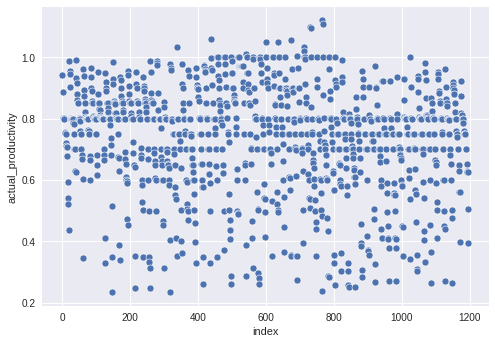

In [ ]:
sns.scatterplot(x='index',y='actual_productivity',data=data)

In [ ]:
x = datao.drop(['actual_productivity'],axis=1)
y = datao.actual_productivity

In [ ]:
x.shape,y.shape

((1185, 13), (1185,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(793, 13)
(392, 13)
(793,)
(392,)


In [ ]:
x = datao.drop(['actual_productivity'],axis=1)
y = datao.actual_productivity
lm1 = LinearRegression()
lm1.fit(x_train,y_train)
y_pred = lm1.predict(x_test)
print(y_pred)
print(np.sqrt(met.mean_squared_error(y_test,y_pred)))

[0.69976023 0.49585296 0.71034016 0.75757998 0.64782347 0.78523536
 0.66481863 0.63033592 0.74052638 0.79539282 0.88759368 0.7351285
 0.42675541 1.06285359 0.83894051 0.82380656 0.56752702 0.55866904
 0.47883213 0.68543397 0.70465605 0.7966992  0.53820393 0.79676573
 0.52785567 0.57439964 0.72143182 0.71207555 0.6329665  0.75884873
 0.74010963 0.78362944 0.68492518 0.59645632 0.70103223 0.81545295
 0.66493666 1.01551021 0.77576824 0.81963324 0.77326501 0.75795588
 0.58142356 0.78904997 0.69789443 0.87200018 0.86541054 0.73514296
 0.8610358  0.74572926 0.88195721 0.63460125 0.80273167 0.84073399
 0.63765616 0.77090817 0.77385141 0.67351996 0.74350017 0.77876937
 0.78094108 0.67691207 0.77031257 0.75614382 0.76580929 0.74838758
 0.63807379 0.70855728 0.87964394 0.68695208 0.98235715 0.80759175
 0.78028078 0.683316   0.6546221  0.72778302 0.99093009 0.74225942
 0.79785631 0.83891602 0.73980437 1.021569   0.57588527 0.76661665
 0.72724439 0.77042319 0.73761313 0.45275947 0.5987135  1.03533

In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

0.21928784805605184
[-9.79604471e-03  1.84859034e-01 -1.09364325e-02 -6.07635771e-03
  5.18201115e-01 -4.45638664e-03 -2.66139195e-07 -3.71842180e-06
  3.30864948e-03  1.33518158e-04 -5.83500444e-03 -4.31102008e-03
  3.03327633e-03]


In [ ]:
data


,index,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,0,1,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1,0,1,1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2,0,0,1,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,3,0,0,1,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,4,0,0,1,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1192,0,1,1,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,1193,0,1,1,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,1194,0,1,1,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,1195,0,1,1,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889
